<a href="https://colab.research.google.com/github/thinhtran30/Terrorism/blob/master/Attackers_Team_5_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 5 - Global Terrorism

![](https://static.euronews.com/articles/stories/04/44/85/80/1440x810_cmsv2_42163f70-0149-51fc-91a2-6608636a809b-4448580.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository.
- Submit your works through Google Form (Link on Learning Portal)

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# Start your codes here!
import pandas as pd
import matplotlib.pyplot as plt
terrorism = pd.read_csv('/content/gdrive/My Drive/FTMLE - Philippines/Week 3/assignments/datasets/05-global-terrorism/terrorism.csv',encoding='ISO-8859-1')



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
terrorism.sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
46910,199106200001,1991,6,20,NaN,0,NaN,92,India,6,South Asia,Jammu and Kashmir,Srinagar,34.083740,74.789902,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,74.0,Marketplace/Plaza/Square,NaN,Nai Sarak Bazaar,...,NaN,NaN,Explosive,1.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,0,1,NaN
57905,199412050002,1994,12,5,NaN,0,NaN,60,Egypt,10,Middle East & North Africa,Asyut,Bani Shakir,27.355419,30.951316,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,17,Terrorists/Non-State Militia,NaN,NaN,NaN,Muslem Militant,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
56123,199404280008,1994,4,28,NaN,0,NaN,604,Zaire,11,Sub-Saharan Africa,Bas-Congo,Kimpese,-5.560387,14.437396,1.0,0,NaN,NaN,0,1,1,1.0,2.0,Other Crime Type,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,14,Private Citizens & Property,75.0,Village/City/Town/Suburb,Government,Town of Kimpese,...,NaN,NaN,Automatic firearm,0.0,NaN,NaN,2.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
120580,201308250048,2013,8,25,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Nineveh,Mosul,36.354145,43.143570,1.0,0,NaN,08/25/2013: Gunmen shot and killed an ethnic S...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,14,Private Citizens & Property,71.0,Race/Ethnicity Identified,Not Applicable,Shabak Grocer,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Over 40 killed as multiple explosions shake I...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
175440,201705310027,2017,5,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Banaadir,Mogadishu,2.059819,45.326115,1.0,0,NaN,05/31/2017: Assailants shot and killed Mohamad...,1,1,1,0.0,NaN,NaN,1.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),19.0,Election-related,National Independent Electoral Commission Somalia,Electoral Delegate: Mohamad Abukar,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Militants claim killing senior milit...","""Program Summary: Radio Andalus in Somali 1030...",NaN,START Primary Collection,0,0,0,0,"201705310026, 201705310027"


In [0]:
terrorism.describe()

In [0]:
usa_event = terrorism[(terrorism['country_txt']=='United States')]
usa_event.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.836000e+03,2836.000000,2836.000000,2836.000000,2836.000000,2836.0,2836.0,2835.000000,2835.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,410.000000,2835.000000,2836.000000,2836.000000,2836.000000,51.000000,2.000000,2836.000000,2716.000000,2827.000000,121.000000,88.000000,115.000000,12.000000,12.000000,12.000000,2836.000000,48.000000,8.0,2836.000000,1854.000000,1782.000000,1786.000000,523.000000,42.000000,24.000000,7.0,7.0,131.000000,2836.000000,2577.000000,148.000000,108.000000,31.000000,22.000000,0.0,0.0,2763.000000,1883.000000,1833.000000,2743.000000,1859.000000,1819.000000,2836.000000,1611.000000,9.610000e+02,2660.000000,66.000000,66.000000,42.000000,22.000000,2172.000000,8.000000e+00,1.0,1.0,0.0,42.000000,26.000000,2836.000000,2836.000000,2836.000000,2836.000000
mean,1.984049e+11,1983.984838,6.222496,15.316996,0.004584,217.0,1.0,36.675562,-91.819622,1.020804,0.015867,0.986601,0.979901,0.986953,-0.323343,2.026829,0.168254,0.825106,0.004937,4.227433,3.686275,4.500000,6.278914,37.396907,212.092324,6.917355,42.511364,225.121739,9.166667,52.250000,265.000000,0.090268,0.291667,0.0,0.099083,-53.752967,-52.881594,0.074468,5.214149,0.142857,5.000000,1.0,9.0,-4.679389,6.611072,16.153667,7.378378,11.824074,7.677419,13.454545,NaN,NaN,1.364821,1.853425,0.037643,7.547211,1.411512,0.020341,0.386460,3.127871,1.026250e+06,0.024812,-7.969697,-0.424242,-16.500000,0.681818,0.004144,8.212500e+05,20000.0,0.0,NaN,3.261905,-6.153846,-4.451693,-4.397743,0.076869,-4.002468
std,1.419586e+09,14.193825,3.392418,9.144808,0.067561,0.0,0.0,7.355989,21.768840,0.244713,0.124985,0.114997,0.140363,0.113494,2.058792,0.538732,0.374158,0.379944,0.070099,2.120057,2.284646,3.535534,5.756015,29.162731,42.068739,6.561995,30.946373,112.164990,5.373899,24.271663,238.615705,0.286616,0.459340,0.0,0.298826,51.658823,49.976379,1.495670,3.253650,2.125013,3.659413,0.0,0.0,4.581345,1.600045,7.125351,2.380206,8.582561,2.650624,9.718550,NaN,NaN,37.564332,44.162724,0.290312,222.572208,23.544523,0.210096,1.914618,0.438560,2.134826e+07,0.155581,51.564141,32.733451,40.802058,1.783158,0.064252,1.726155e+06,NaN,NaN,NaN,1.623900,44.880902,4.629953,4.690391,0.597243,4.761211
min,1.970010e+11,1970.000000,1.000000,0.000000,0.000000,217.0,1.0,17.966072,-157.858333,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,8.000000,1.000000,1.000000,38.000000,1.000000,8.000000,11.000000,0.000000,0.000000,0.0,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,1.0,9.0,-9.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.0,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.971119e+11,1971.000000,3.000000,7.000000,0.000000,217.0,1.0,34.097866,-117.794609,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.250000,1.000000,11.000000,217.000000,2.000000,15.000000,217.000000,6.000000,42.000000,217.000000,0.000000,0.000000,0.0,0.000000,-99.000000,-99.000000,0.000000,2.000000,0.000

In [0]:
group = usa_event.groupby(["gname"]).count().sort_values(by="eventid", ascending=False).head(11).iloc[1:11]
group

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
gname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anti-Abortion extremists,196,196,196,196,3,196,0,196,196,196,196,196,196,196,196,196,196,74,175,196,196,196,196,2,2,196,196,196,196,196,6,6,1,1,196,196,196,196,86,195,...,0,0,137,196,175,175,196,176,175,196,153,153,120,92,196,2,2,2,1,0,0,188,0,0,0,0,0,2,2,1,148,175,173,153,196,196,196,196,196,34
Left-Wing Militants,169,169,169,169,1,169,1,169,169,169,169,169,169,169,169,169,169,98,169,169,169,169,169,48,48,169,169,169,169,169,1,1,0,0,169,169,167,167,165,167,...,0,0,157,169,169,169,169,169,169,169,127,127,33,84,169,1,1,0,1,1,1,169,0,0,0,0,0,1,1,0,130,169,144,82,169,169,169,169,169,28
Fuerzas Armadas de Liberacion Nacional (FALN),120,120,120,120,0,120,0,120,120,120,120,120,120,120,120,120,120,33,45,120,120,120,120,3,3,120,120,120,120,120,0,0,0,0,120,120,115,115,48,120,...,0,0,98,110,46,44,109,42,39,120,65,65,45,32,81,2,2,0,0,0,0,80,0,0,0,0,0,0,0,0,33,45,42,42,120,120,120,120,120,41
White extremists,87,87,87,87,7,87,1,87,87,87,87,87,87,87,87,87,87,53,86,87,87,87,87,21,21,87,87,87,87,87,1,1,0,0,87,87,85,85,75,84,...,0,0,68,86,85,85,85,84,85,87,52,52,28,42,81,0,0,0,0,0,0,62,0,0,0,0,0,0,0,0,65,86,78,63,87,87,87,87,87,6
New World Liberation Front (NWLF),86,86,86,86,0,86,0,86,86,86,86,86,86,86,86,86,86,4,4,86,86,86,86,1,1,86,86,86,86,86,0,0,0,0,86,86,65,65,9,86,...,0,0,81,86,5,6,86,5,6,86,36,36,19,5,82,0,0,0,0,0,0,82,0,0,0,0,0,0,0,0,1,4,4,2,86,86,86,86,86,2
Black Nationalists,83,83,83,83,0,83,0,83,83,83,83,82,83,83,83,83,83,61,82,83,83,83,83,18,18,83,83,83,83,83,3,3,0,0,83,83,79,79,77,74,...,0,0,74,83,82,82,83,82,82,83,63,63,18,55,83,1,1,1,0,0,0,83,0,0,0,0,0,1,1,0,70,82,68,44,83,83,83,83,83,11
Animal Liberation Front (ALF),76,76,76,76,0,76,0,76,76,76,76,76,76,76,76,76,76,41,76,76,76,76,76,1,1,76,76,76,76,76,0,0,0,0,76,76,70,70,75,76,...,0,0,47,76,76,76,76,76,76,76,64,64,44,44,76,0,0,0,0,0,0,45,0,0,0,0,0,0,0,0,41,76,66,44,76,76,76,76,76,11
Jewish Defense League (JDL),74,74,74,74,1,74,0,74,74,74,74,74,74,74,74,74,74,17,21,74,74,74,74,0,0,74,74,74,74,74,1,1,0,0,74,74,67,67,32,74,...,0,0,64,72,32,26,70,28,24,74,32,32,22,15,68,1,1,0,0,1,1,66,0,0,0,0,0,0,0,0,20,21,20,13,74,74,74,74,74,4
Student Radicals,71,71,71,71,3,71,0,71,71,71,71,71,71,71,71,71,71,37,71,71,71,71,71,10,10,71,71,71,71,71,0,0,0,0,71,71,70,70,69,69,...,0,0,62,71,71,71,71,71,71,71,58,58,26,48,71,0,0,0,0,0,0,71,0,0,0,0,0,0,0,0,54,71,60,43,71,71,71,71,71,8


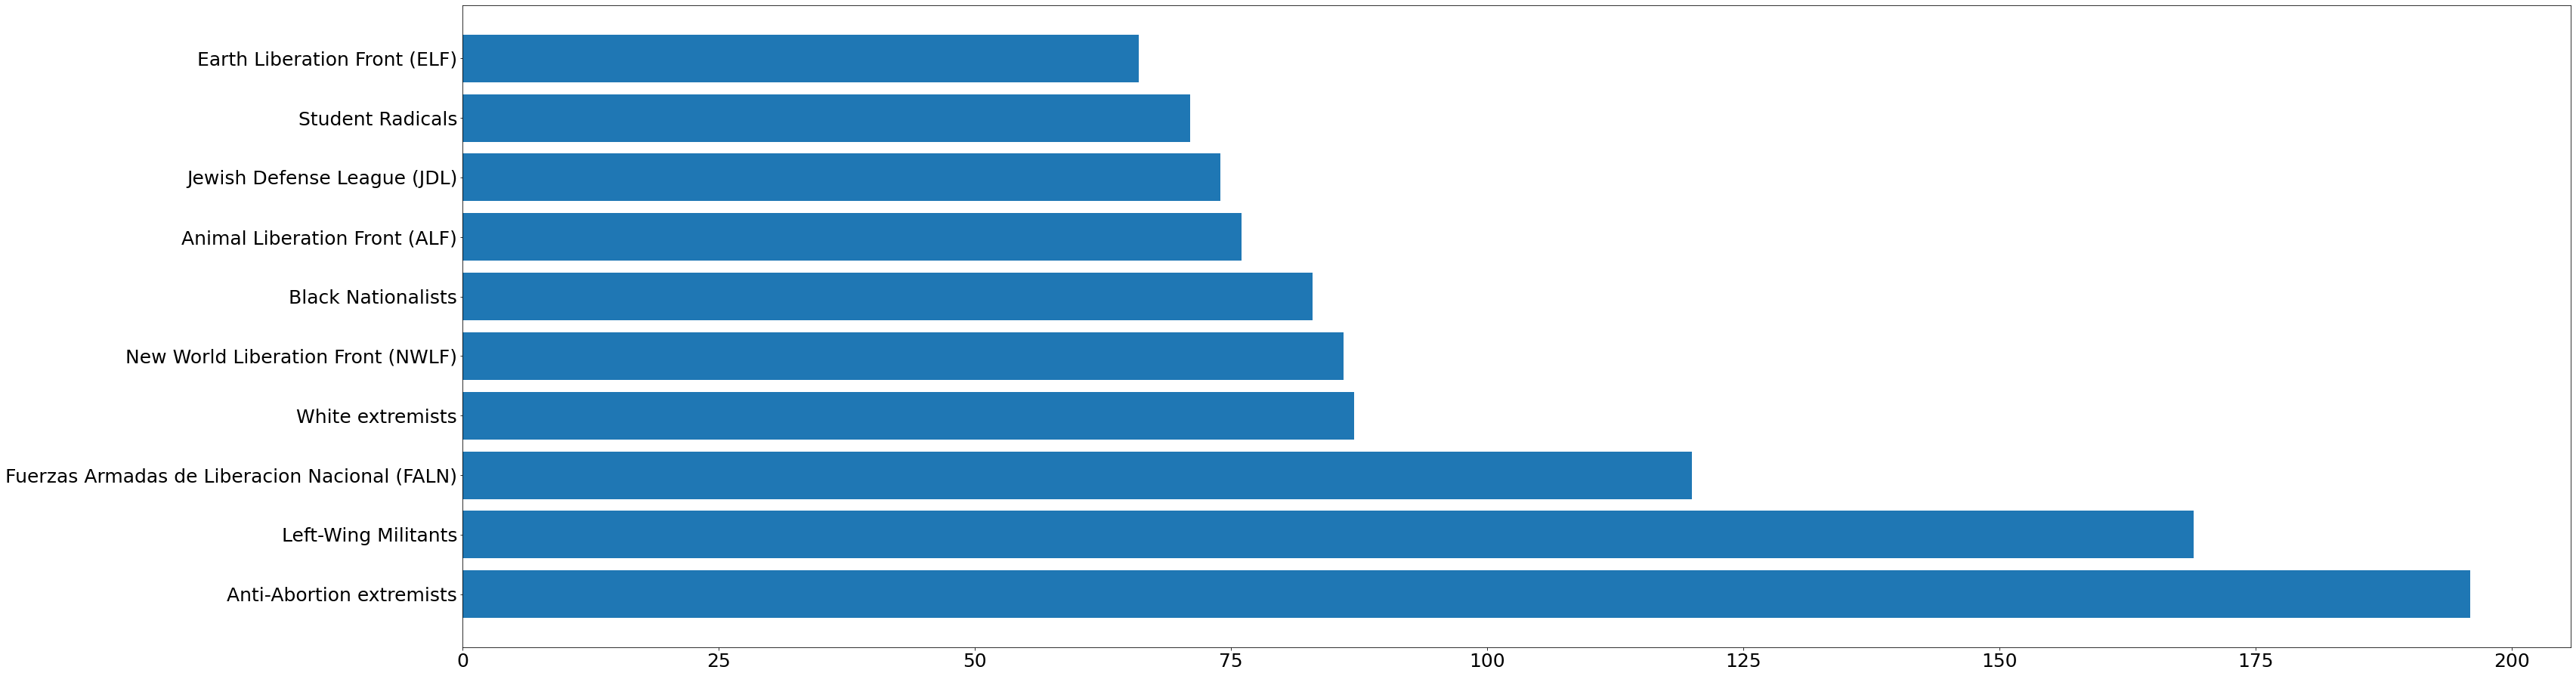

In [0]:
plt.figure(figsize=(50,10))
plt.subplots_adjust(bottom=-0.3)
plt.rcParams.update({'font.size': 25})
group_bar = plt.barh(group.index, 'eventid',data = group)


In [0]:
individual = usa_event.groupby(["individual"]).count().sort_values(by="eventid", ascending=False)
individual

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
individual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2555,2555,2555,2555,23,2555,8,2555,2555,2555,2555,2551,2555,2554,2554,2555,2555,865,1547,2555,2555,2555,2555,342,342,2554,2555,2555,2555,2555,45,45,2,2,2555,2555,2440,2440,1630,2511,...,0,0,2070,2484,1633,1589,2466,1617,1575,2555,1502,1502,881,950,2384,54,54,32,18,6,13,2088,8,1,1,0,1,31,31,16,1133,1547,1387,992,2555,2555,2555,2555,2555,412
1,281,281,281,281,14,281,4,281,281,281,281,281,281,281,281,281,281,92,236,281,281,281,281,68,68,281,281,281,281,281,6,6,0,0,281,281,276,276,268,280,...,0,0,222,279,250,244,277,242,244,281,109,109,80,103,276,12,12,10,4,1,1,84,0,0,0,0,0,11,11,10,105,236,230,194,281,281,281,281,281,66


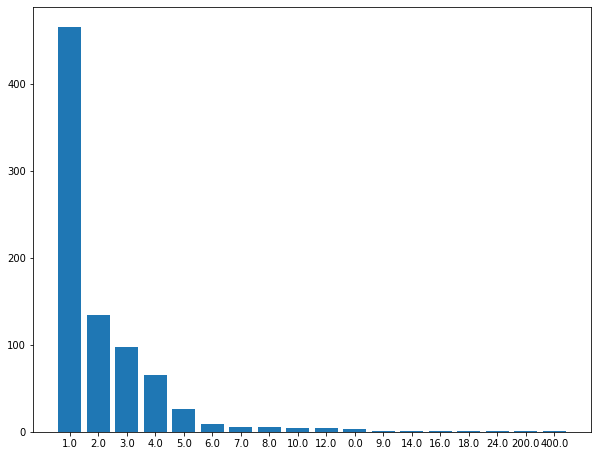

In [0]:
number_perp = usa_event.groupby(["nperps"]).count().sort_values(by="eventid", ascending=False).iloc[1:]
number_perp.index = number_perp.index.astype(str, copy = False)
plt.figure(figsize=(10,5))
plt.subplots_adjust(bottom=-0.3)

perp_bar = plt.bar(number_perp.index, 'eventid',data = number_perp)


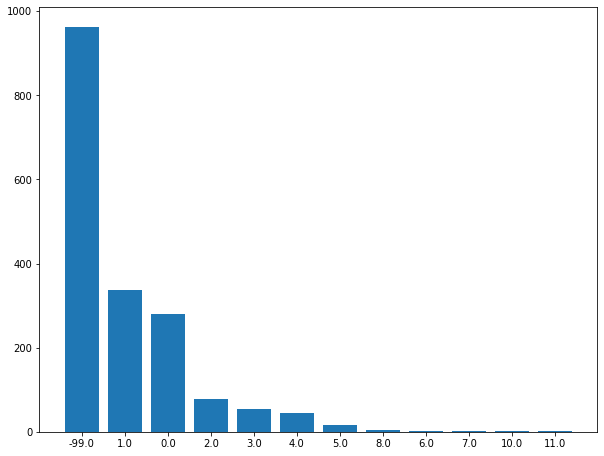

In [0]:
number_perp_cap = usa_event.groupby(["nperpcap"]).count().sort_values(by="eventid", ascending=False)
number_perp_cap.index = number_perp_cap.index.astype(str, copy = False)
plt.figure(figsize=(10,5))
plt.subplots_adjust(bottom=-0.3)

perp_bar = plt.bar(number_perp_cap.index, 'eventid',data = number_perp_cap)

In [0]:
for motive in usa_event["motive"].unique():
  print(type(motive) == str)

In [0]:
!pip install wordcloud

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import requests

def calculate_frequencies():
    # Here is a list of uninteresting words you can use to process your text
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "in", "not", "for", "should", "would", "so", "shall", "on", "thou", "thee", "thy", "than", "s","d", "o", "ll", "specific", "incident", "unknown", "motive",
    "however"]
    uninteresting_words = set(uninteresting_words)
    # result is a dictionary which store the frequency of each words in the text 
    # so we need result with word as key and frequency as value
    result = {}
    for motive in usa_event["motive"].unique():
      if(type(motive) == str):
        to_be_cleaned = motive.lower().split()
        for word in to_be_cleaned:
          if word in uninteresting_words:
            pass
          elif word not in result:
            result[word]  = 1
          else:
            result[word] += 1
    
    #wordcloud

    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(result)
    return cloud.to_array()

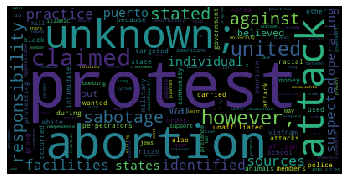

In [0]:
myimage = calculate_frequencies()

plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

# New Section